# Test Práctico - Científico de Datos SICEX
## Desafío: Unificación y Normalización de Entidades

## Introducción

Este notebook está estructurado para evaluar tus habilidades en el análisis y procesamiento de datos de comercio exterior. Contiene cuatro bloques principales con objetivos claros. Completa cada bloque según las instrucciones. Las tareas avanzadas son opcionales y te permitirán ganar puntos extra.

### CONTEXTO:
SICEX maneja grandes volúmenes de datos de comercio exterior donde uno de los principales 
desafíos es la consistencia y normalización de entidades como nombres de empresas,
ciudades y productos. Este test evaluará tu capacidad para proponer e implementar
soluciones a este problema real.

### OBJETIVOS DE EVALUACIÓN:
- Capacidad de análisis y limpieza de datos
- Habilidad para desarrollar algoritmos de matching y normalización
- Pensamiento creativo en la resolución de problemas
- Capacidad de escalar soluciones
- Documentación y comunicación técnica


In [1]:
# Configuración inicial
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

from etl_data_science_test import config

2025-01-20 22:28:09.387 | INFO     | etl_data_science_test.config:<module>:11 - PROJ_ROOT path is: /Users/emhidalgo/Documents/GitHub/etl-data-science-test


In [16]:
from Levenshtein import ratio as levenshtein_ratio
from fuzzywuzzy import fuzz

### **Bloque 1: Análisis Exploratorio (EDA)**

#### Objetivo
Familiarízate con el dataset proporcionado y realiza un análisis básico para identificar patrones, inconsistencias y oportunidades de limpieza.


In [2]:
# 1. Cargar datos
def load_and_examine_data():
    # Cargar el dataset
    filepath = os.path.join(config.RAW_DATA_DIR, '10_Importaciones_2024_Octubre.xlsb')
    df = pd.read_excel(filepath)
    
    # Información básica del dataset
    print("=== INFORMACIÓN BÁSICA DEL DATASET ===")
    print(f"Número de registros: {len(df)}")
    print(f"Número de columnas: {len(df.columns)}")
    
    return df

##  EJERCICIO 1: ANÁLISIS EXPLORATORIO Y DIAGNÓSTICO 

Trabajaremos con un dataset real de importaciones que contiene información sobre empresas
y ubicaciones. Tu primera tarea es realizar un análisis exploratorio enfocado en 
la calidad de los datos de las entidades.

### Analiza específicamente:
1. Nombres de empresas (NOMBRE_IMPORTADOR, NOMBRE_EXPORTADOR)
2. Ubicaciones (CIUDAD_PAIS_EXPORTADOR, DEPARTAMENTO_IMPORTADOR)
3. Direcciones (DIRECCION_IMPORTADOR, DIRECCION_EXPORTADOR)

### Para cada campo:
- Identifica patrones en las inconsistencias
- Cuantifica el impacto de estas inconsistencias
- Propón una estrategia de limpieza y normalización


In [3]:
def analyze_entity_fields(df):

  # Tu código aquí
  """Analiza campos relacionados con entidades como importadores y exportadores."""
  print("\n=== Análisis de Campos de Entidades ===")
  
  # Análisis de nombres de importadores y exportadores
  for column in ['NOMBRE_IMPORTADOR', 'NOMBRE_EXPORTADOR']:
      print(f"\nColumna: {column}")
      print(f"Valores únicos: {df[column].nunique()}")
      print(f"Valores nulos: {df[column].isnull().sum()}")
      print(f"Ejemplos: {df[column].dropna().unique()[:5]}")

  pass  

In [4]:
# 3. Análisis de patrones y anomalías
def analyze_patterns(df):
    """Identifica patrones y posibles anomalías en los datos."""
    print("\n=== ANÁLISIS DE PATRONES Y ANOMALÍAS ===")
    
    # Análisis de peso y valor FOB
    df['PESO_NETO'] = pd.to_numeric(df['PESO_NETO'], errors='coerce')
    df['VALOR_FOB_USD'] = pd.to_numeric(df['VALOR_FOB_USD'], errors='coerce')

    # Anomalías: peso neto igual a 0
    anomalies_weight = df[df['PESO_NETO'] == 0]
    print(f"Registros con peso neto cero: {len(anomalies_weight)}")

    # Anomalías: valores FOB negativos
    anomalies_fob = df[df['VALOR_FOB_USD'] < 0]
    print(f"Registros con valor FOB negativo: {len(anomalies_fob)}")

    # Identificación de outliers en peso neto usando IQR
    Q1 = df['PESO_NETO'].quantile(0.25)
    Q3 = df['PESO_NETO'].quantile(0.75)
    IQR = Q3 - Q1
    outliers_weight = df[(df['PESO_NETO'] < (Q1 - 1.5 * IQR)) | (df['PESO_NETO'] > (Q3 + 1.5 * IQR))]
    print(f"Registros con peso neto fuera del rango intercuartílico (IQR): {len(outliers_weight)}")

    # Identificación de outliers en valor FOB usando IQR
    Q1_fob = df['VALOR_FOB_USD'].quantile(0.25)
    Q3_fob = df['VALOR_FOB_USD'].quantile(0.75)
    IQR_fob = Q3_fob - Q1_fob
    outliers_fob = df[(df['VALOR_FOB_USD'] < (Q1_fob - 1.5 * IQR_fob)) | (df['VALOR_FOB_USD'] > (Q3_fob + 1.5 * IQR_fob))]
    print(f"Registros con valor FOB fuera del rango intercuartílico (IQR): {len(outliers_fob)}")

    # Tu código aquí
    pass

In [5]:
# 4. Generar visualizaciones
def create_visualizations(df, entity_stats):
    """Genera visualizaciones basadas en las estadísticas de las entidades."""
    import matplotlib.pyplot as plt

    # Configuración de estilo
    plt.style.use('seaborn-v0_8-notebook')

    # Gráfico de completitud de datos
    plt.figure(figsize=(10, 5))
    missing_data = df.isnull().mean() * 100
    missing_data = missing_data[missing_data > 0]
    missing_data.sort_values(inplace=True)
    missing_data.plot(kind='barh', color='skyblue')
    plt.title('Porcentaje de Datos Faltantes por Columna')
    plt.xlabel('Porcentaje de datos faltantes')
    plt.ylabel('Columnas')
    plt.tight_layout()
    plt.show()

    # Distribución de peso neto
    plt.figure(figsize=(10, 6))
    plt.hist(df['PESO_NETO'].dropna(), bins=30, color='lightgreen', edgecolor='black')
    plt.title('Distribución de Peso Neto')
    plt.xlabel('Peso Neto')
    plt.ylabel('Frecuencia')
    plt.tight_layout()
    plt.show()

    # Distribución de valores FOB
    plt.figure(figsize=(10, 6))
    plt.hist(df['VALOR_FOB_USD'].dropna(), bins=30, color='coral', edgecolor='black')
    plt.title('Distribución de Valores FOB (USD)')
    plt.xlabel('Valor FOB (USD)')
    plt.ylabel('Frecuencia')
    plt.tight_layout()
    plt.show()


    pass


In [6]:
df = load_and_examine_data()
    
# 2. Analizar campos de entidades
entity_stats = analyze_entity_fields(df)






=== INFORMACIÓN BÁSICA DEL DATASET ===
Número de registros: 201855
Número de columnas: 125

=== Análisis de Campos de Entidades ===

Columna: NOMBRE_IMPORTADOR
Valores únicos: 10923
Valores nulos: 0
Ejemplos: ['MARCAS EUROPEAS S.A.S' 'L V COLOMBIA SAS' 'SONEPAR COLOMBIA SAS'
 'ETERNA S A' 'FORUS COLOMBIA S.A.S']

Columna: NOMBRE_EXPORTADOR
Valores únicos: 25455
Valores nulos: 0
Ejemplos: ['KARL LAGERFELD INTERNATIONAL B.V.' 'LOUIS VUITTON  MALLETIER SAS'
 'SOFAMEL SLU' 'SHANDONG INTCO MEDICAL PRODUCTS CO.,LTD'
 'LEA INTERNATIONAL GROUP LIMITED']


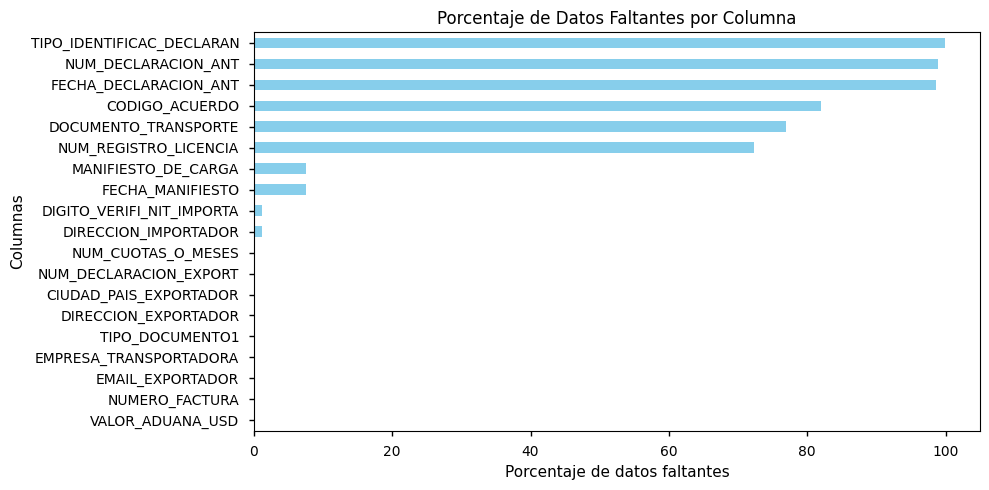

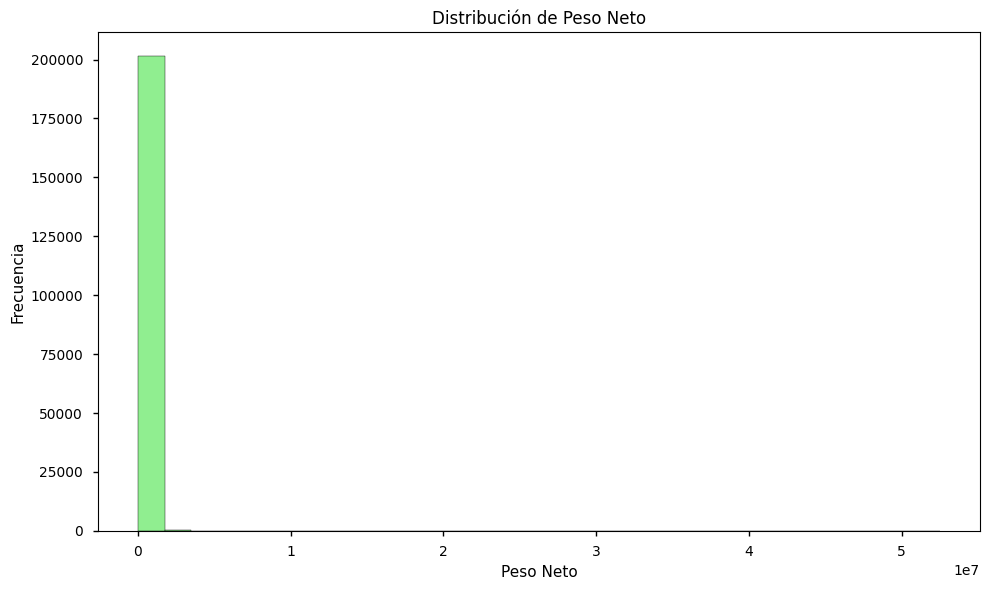

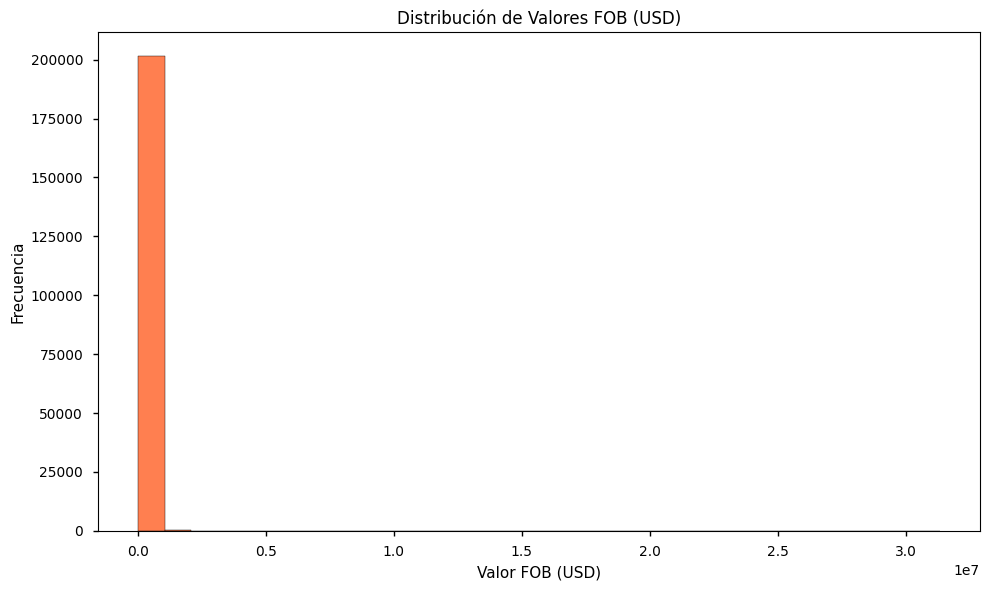

,BANC_CODIGO_BANCO,COD_ADUANA_PRESENTADA,ADUANA_PRESENTADA,CODIGO_SUCURSAL,CODIGO_CAJERO,CONSECUTIVO_CAJERO,DIGITO_VERIFICACION_DOC,NUM_DECLARACION_ANT,FECHA_DECLARACION_ANT,MANIFIESTO_DE_CARGA,...,COD_LUGAR_INGRESO_MCIA,IDENTIFICADOR_DOCUMENTO,IDENTIFICACION_FORMULARIO,CODIGO_MUNICIPIO,DOCTO_IDENTIF_DECLAR,NOMBRE_DECLARANTE,EMAIL_EXPORTADOR,NUMERO_FACTURA,FECHA_FACTURA,VALOR_CIF_USD
0,91,3,Aduanas de Bogotá - Aeropuerto El Dorado,3,4,198761,9,NaN,NaN,3.297000e+03,...,BOG,446286897,32024001468043,11001,900183992.0,MARCAS EUROPEAS SAS,53647785,0001115238,20240416,786.35
1,91,3,Aduanas de Bogotá - Aeropuerto El Dorado,3,4,212524,1,NaN,NaN,4.414414e+06,...,BOG,446574534,32024001516790,11001,830023585.0,AGENCIA DE ADUANAS SIACOMEX SAS NIVEL 1,43 318571064,4127842679,20241015,504.33
2,92,3,Aduanas de Bogotá - Aeropuerto El Dorado,3,0,788691,6,NaN,NaN,5.750149e+11,...,BOG,446295207,32024001473258,11001,830023585.0,AGENCIA DE ADUANAS SIACOMEX SAS NIVEL 1,admin@sofamel.es,SFX003787,20241010,1537.40
3,92,3,Aduanas de Bogotá - Aeropuerto El Dorado,3,0,788693,0,NaN,NaN,5.750149e+11,...,BOG,446295209,32024001473260,11001,830023585.0,AGENCIA DE ADUANAS SIACOMEX SAS NIVEL 1,admin@sofamel.es,SFX003787,20241010,4406.08
4,92,35,Impuestos y Aduanas de Buenaventura,35,0,235689,1,NaN,NaN,5.750148e+11,...,BUN,445356360,35202400050540,11001,830023585.0,AGENCIA DE ADUANAS SIACOMEX SAS NIVEL 1,0536-6136888,IN24008266,20240716,29706.26


In [8]:
# 4. Crear visualizaciones
create_visualizations(df, entity_stats)

df.head()

### **Bloque 2: Desarrollo de Algoritmo de Matching**

Desarrolla un algoritmo que pueda identificar cuando dos nombres de empresa se refieren
a la misma entidad, considerando:
- Variaciones en el orden de las palabras
- Errores tipográficos comunes
- Abreviaciones y acrónimos
- Diferentes formatos legales (S.A., LTDA, etc.)

Requerimientos:
1. Implementa al menos dos métodos diferentes de matching
2. Evalúa y compara su efectividad
3. Propón una métrica para medir la calidad del matching
4. Documenta los casos edge que identificaste

In [17]:
def normalize_company_name(name):
    """Normaliza y estandariza los nombres de las empresas para facilitar el matching."""
    import re

    if not isinstance(name, str):
        return name

    # Convertir a mayúsculas y eliminar espacios adicionales
    name = name.upper().strip()

    # Eliminar caracteres especiales
    name = re.sub(r'[^A-Z0-9\s]', '', name)

    # Reemplazar abreviaciones comunes
    replacements = {
        'S A': 'SA',
        'S A S': 'SAS',
        'LTDA': '',
        'LIMITADA': '',
        'COMPANIA': 'CIA',
        'CIA': ''
    }
    for key, value in replacements.items():
        name = name.replace(key, value)

    # Eliminar múltiples espacios
    name = re.sub(r'\s+', ' ', name).strip()

    return name
    pass

In [18]:
def match_companies(name1, name2, threshold=0.85):
    """Compara dos nombres de empresas utilizando Levenshtein y Fuzzy Matching con un umbral."""
    from Levenshtein import ratio as levenshtein_ratio
    from fuzzywuzzy import fuzz

    # Normalización de los nombres
    name1 = normalize_company_name(name1)
    name2 = normalize_company_name(name2)

    # Método 1: Ratio de similitud (Levenshtein)
    ratio = levenshtein_ratio(name1, name2)

    # Método 2: Fuzzy matching (fuzzywuzzy)
    fuzz_ratio = fuzz.ratio(name1, name2) / 100

    # Evaluación contra el umbral
    match = ratio >= threshold or fuzz_ratio >= threshold

    return {
        'name1': name1,
        'name2': name2,
        'levenshtein_ratio': ratio,
        'fuzzy_ratio': fuzz_ratio,
        'match': match
    }
    pass

In [20]:
# Prueba tu implementación con algunos casos de ejemplo

test_cases = [
    ("Compañía de Importaciones S.A.", "COMPANIA DE IMPORTACIONES SA"),
    ("AGENCIA DE ADUANAS S.A.S.", "AGENCIA DE ADUANAS SAS"),
    ("Distribuidora LTDA", "DISTRIBUIDORA LIMITADA"),
    ("Sofamel S.A.", "SOFAMEL"),
    ("Transportes del Norte", "TRANSPORTE DEL NORTE LTDA"),
]

# Probar los casos utilizando el threshold de 0.85
results = []
for name1, name2 in test_cases:
    result = match_companies(name1, name2, threshold=0.85)
    results.append(result)

# Crear un DataFrame con los resultados
results_df = pd.DataFrame(results)
results_df

,name1,name2,levenshtein_ratio,fuzzy_ratio,match
0,COMPAA DE IMPORTACIONES SA,DE IMPORTACIONES SA,0.844444,0.84,False
1,AGEN DE ADUANAS SAS,AGEN DE ADUANAS SAS,1.000000,1.00,True
2,DISTRIBUIDORA,DISTRIBUIDORA,1.000000,1.00,True
3,SOFAMEL SA,SOFAMEL,0.823529,0.82,False
4,TRANSPORTES DEL NORTE,TRANSPORTE DEL NORTE,0.975610,0.98,True


### **Bloque 3: Escalabilidad y Optimización (Opcional)**

Ahora que has desarrollado un algoritmo básico, necesitamos escalarlo para procesar
grandes volúmenes de datos eficientemente.

### Tareas:
1. Optimiza tu algoritmo para mejorar su rendimiento
2. Implementa una estrategia para reducir comparaciones innecesarias
3. Propón una estructura de datos eficiente para almacenar los matches
4. Sugiere una arquitectura para procesar actualizaciones incrementales

### Nota del postulante:

En este caso es posible utilizar rapidfuzz en vez de fuzzyfuzz, ya que tiene mejor rendimiento. Tambien seria posible limitar las iteraciones con un parametro limit, tambien se pueden guardar los matches en diccionarios para acceder rapidamente.
El Hashing puede reducir las comparaciones.

Se pone un ejemplo mas no la implementacion completa en la siguiente celda:

In [21]:
from rapidfuzz import process, fuzz

# Datos iniciales
referencias = ["cadena1", "cadena2", "cadena3", "cadena4"]
elementos = ["cadenaA", "cadenaB", "cadenaC", "cadena3"]

# Filtro por longitud para reducir comparaciones innecesarias
def filtro_longitudes(cadena, referencias, umbral=3):
    return [ref for ref in referencias if abs(len(cadena) - len(ref)) <= umbral]

# Matching optimizado
resultados = []
for elemento in elementos:
    # Filtrar referencias antes de realizar comparaciones
    referencias_filtradas = filtro_longitudes(elemento, referencias)

    # Usar RapidFuzz para encontrar los mejores matches
    matches = process.extract(
        elemento, referencias_filtradas, scorer=fuzz.ratio, limit=3
    )  # Top 3 matches

    # Almacenar los resultados
    resultados.append((elemento, matches))

# Mostrar resultados
for elemento, matches in resultados:
    print(f"Elemento: {elemento}")
    for match, score, _ in matches:
        print(f"  Match: {match}, Score: {score:.2f}")


Elemento: cadenaA
  Match: cadena1, Score: 85.71
  Match: cadena2, Score: 85.71
  Match: cadena3, Score: 85.71
Elemento: cadenaB
  Match: cadena1, Score: 85.71
  Match: cadena2, Score: 85.71
  Match: cadena3, Score: 85.71
Elemento: cadenaC
  Match: cadena1, Score: 85.71
  Match: cadena2, Score: 85.71
  Match: cadena3, Score: 85.71
Elemento: cadena3
  Match: cadena3, Score: 100.00
  Match: cadena1, Score: 85.71
  Match: cadena2, Score: 85.71


## EJERCICIO BONUS: INTEGRACIÓN CON LLMs

Demuestra cómo podrías mejorar la solución anterior utilizando Large Language Models (LLMs).
Específicamente, integra Groq (https://groq.com/) y otros modelos open source como Llama.

#### Objetivos:
1. Uso de LLMs para mejorar el matching y normalización
2. Implementación eficiente y costos-efectiva
3. Manejo de casos edge con ayuda de LLMs

##### Tareas:
1. Implementa un pipeline que utilice Groq API para:
   - Normalización de nombres de empresas
   - Detección de entidades similares
   - Validación de matches dudosos

2. Compara el rendimiento y precisión entre:
   - Tu solución basada en reglas/algoritmos
   - Solución utilizando LLMs
   - Enfoque híbrido

3. Optimización de costos:
   - Estrategia para minimizar llamadas a la API
   - Caching inteligente de resultados
   - Balance entre precisión y costos

4. Casos de uso avanzados:
   - Extracción de información adicional de las descripciones
   - Categorización automática de empresas
   - Detección de anomalías en los datos

In [27]:
from dotenv import load_dotenv
import os

load_dotenv()

print(os.environ.get("GROQ_API_KEY"))  # Debería imprimir la clave o `None`

None


In [29]:
from groq import Groq
from dotenv import load_dotenv

Se hace necesario generar una key y ponerla manualmente para ver cual funciona con el agente

In [36]:

load_dotenv()
client = Groq(
    api_key=os.environ.get("GROQ_API_KEY") or "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"
)

In [33]:
def normalize_entity_with_llm(entity_name, client):
    """
    Utiliza Groq para normalizar nombres de entidades
    """
    prompt = f"""
    Normaliza el siguiente nombre de empresa, eliminando variaciones innecesarias 
    y manteniendo la información esencial: {entity_name}
    
    Formato deseado:
    - Sin puntuación innecesaria
    - Siglas de forma estándar
    - Tipo de empresa al final (SA, LTDA, etc.)
    """
    
    try:
        response = client.chat.completions.create(
            model="mixtral-8x7b-32768",  # o cualquier otro modelo disponible en Groq
            messages=[
                {"role": "system", "content": "Eres un experto en normalización de nombres de empresas."},
                {"role": "user", "content": prompt}
            ],
            temperature=0.2
        )
        return response.choices[0].message.content.strip()
    except Exception as e:
        print(f"Error al llamar a Groq API: {e}")
        return entity_name

In [37]:
def match_entities_with_llm(entity1, entity2, client):
    """
    Utiliza Groq para determinar si dos entidades son la misma
    """
    prompt = f"""
    Determina si las siguientes dos empresas son la misma entidad:
    Empresa 1: {entity1}
    Empresa 2: {entity2}
    
    Responde con:
    - MATCH: Si son definitivamente la misma empresa
    - POSSIBLE_MATCH: Si probablemente son la misma empresa
    - NO_MATCH: Si son empresas diferentes
    
    Explica tu razonamiento.
    """
    
    try:
        response = client.chat.completions.create(
            model="mixtral-8x7b-32768",
            messages=[
                {"role": "system", "content": "Eres un experto en identificación y matching de entidades empresariales."},
                {"role": "user", "content": prompt}
            ],
            temperature=0.1
        )
        return response.choices[0].message.content.strip()
    except Exception as e:
        print(f"Error al llamar a Groq API: {e}")
        return "ERROR"

In [38]:
# Implementa tu solución utilizando estas funciones como base
# Demuestra cómo integrarías esto en tu pipeline general de matching

def pipeline_matching(elementos, referencias, client):
    resultados_pipeline = []

    for elemento in elementos:
        # Paso 1: Normalizar el nombre de la entidad
        elemento_normalizado = normalize_entity_with_llm(elemento, client)

        for referencia in referencias:
            # Paso 2: Normalizar las referencias
            referencia_normalizada = normalize_entity_with_llm(referencia, client)

            # Paso 3: Determinar si hay un match entre las entidades
            match_result = match_entities_with_llm(elemento_normalizado, referencia_normalizada, client)

            # Almacenar los resultados
            resultados_pipeline.append({
                "elemento": elemento,
                "referencia": referencia,
                "elemento_normalizado": elemento_normalizado,
                "referencia_normalizada": referencia_normalizada,
                "match_result": match_result
            })

    return resultados_pipeline

# Datos de prueba
elementos = ["Empresa ABC S.A.", "Compañía XYZ Ltda.", "Corporación 123"]
referencias = ["ABC Sociedad Anónima", "XYZ Limitada", "Corporacion 123"]

# Ejecutar el pipeline
resultados = pipeline_matching(elementos, referencias, client)

# Mostrar resultados
for resultado in resultados:
    print("Elemento original:", resultado["elemento"])
    print("Referencia original:", resultado["referencia"])
    print("Elemento normalizado:", resultado["elemento_normalizado"])
    print("Referencia normalizada:", resultado["referencia_normalizada"])
    print("Resultado del match:", resultado["match_result"])
    print("-")


Elemento original: Empresa ABC S.A.
Referencia original: ABC Sociedad Anónima
Elemento normalizado: Empresa ABC SA

Explicación:

- Se eliminó el punto después de la abreviatura "S.A." ya que no es necesario según el formato deseado.
- Se escribió la abreviación "SA" en mayúsculas y sin puntos, de acuerdo con las convenciones para la normalización de siglas.
Referencia normalizada: Sure, I'd be happy to help you normalize the name of the company. Here's how I would do it:

1. Remove punctuation that is not necessary: "ABC Sociedad Anónima"
2. Write out the abbreviation for "company" in standard form: "ABC Sociedad Anonima"
3. Move the type of company to the end: "ABC Anonima SA"

So, the normalized name of the company would be "ABC Anonima SA".
Resultado del match: NO\_MATCH: Son empresas diferentes.

Explicación:

- Aunque las dos empresas pueden tener una relación o pertenecer al mismo grupo, el nombre "ABC Anonima SA" no coincide con "Empresa ABC SA".
- La normalización de la primer